In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [3]:
%matplotlib inline


In [4]:
sns.set(style="whitegrid")


In [7]:
df = pd.read_excel('../data/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df = df.dropna(subset=['CustomerID'])
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df = df[~df['InvoiceNo'].str.startswith('C')]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',   
    'Quantity': 'sum',        
    'TotalPrice': 'sum'       
}).rename(columns={'InvoiceNo': 'Frequency', 'Quantity': 'TotalQuantity'})
customer_df.head()


,Frequency,TotalQuantity,TotalPrice
CustomerID,,,
12346.0,1,74215,77183.60
12347.0,7,2458,4310.00
12348.0,4,2341,1797.24
12349.0,1,631,1757.55
12350.0,1,197,334.40


In [10]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

customer_df['Cluster'] = kmeans.fit_predict(customer_df)
customer_df['Cluster'].value_counts()


Cluster
0    4309
2      25
1       5
Name: count, dtype: int64

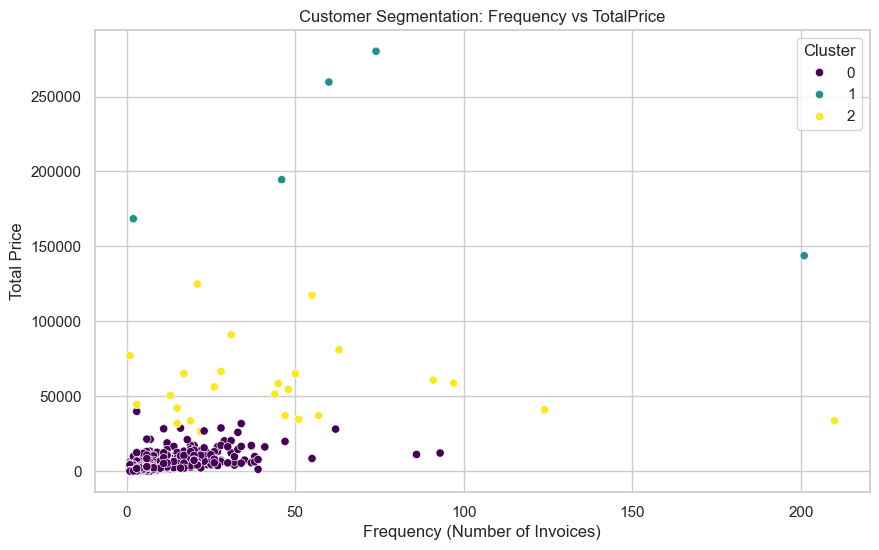

In [11]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=customer_df, x='Frequency', y='TotalPrice', hue='Cluster', palette='viridis')

plt.title('Customer Segmentation: Frequency vs TotalPrice')
plt.xlabel('Frequency (Number of Invoices)')
plt.ylabel('Total Price')

plt.savefig('../plots/cluster_scatter.png')

plt.show()


In [12]:
for cluster in sorted(customer_df['Cluster'].unique()):
    customer_ids = customer_df[customer_df['Cluster'] == cluster].index
    df_cluster = df[df['CustomerID'].isin(customer_ids)]
    top_products = df_cluster['Description'].value_counts().head(5)
    
    print(f"\nТоп-5 товаров для кластера {cluster}:")
    print(top_products)



Топ-5 товаров для кластера 0:
Description
WHITE HANGING HEART T-LIGHT HOLDER    1889
REGENCY CAKESTAND 3 TIER              1561
JUMBO BAG RED RETROSPOT               1442
ASSORTED COLOUR BIRD ORNAMENT         1360
PARTY BUNTING                         1318
Name: count, dtype: int64

Топ-5 товаров для кластера 1:
Description
CARRIAGE                              84
REGENCY CAKESTAND 3 TIER              59
WHITE HANGING HEART T-LIGHT HOLDER    44
SET OF 3 REGENCY CAKE TINS            36
JAM MAKING SET WITH JARS              36
Name: count, dtype: int64

Топ-5 товаров для кластера 2:
Description
JUMBO BAG RED RETROSPOT               151
CHILLI LIGHTS                         122
REGENCY CAKESTAND 3 TIER              104
JUMBO BAG PINK POLKADOT               101
WHITE HANGING HEART T-LIGHT HOLDER     95
Name: count, dtype: int64
